# Step Count & Weather Analysis
This notebook explores the relationship between daily step counts and weather conditions. The hypothesis is that weather influences physical activity levels, with rainy/cloudy weather potentially reducing step counts and sunny days increasing them.

In [4]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the datasets
step_data = pd.read_csv('stepp.csv')
weather_data = pd.read_csv('weatherrr.csv')

# Convert Date columns to datetime format
step_data['Date'] = pd.to_datetime(step_data['Date'])
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Merge datasets on Date
merged_data = pd.merge(step_data, weather_data, on='Date')
merged_data.head()

,Date,Step Count,Temperature,Precipitation,"Cloudiness"""
0,2024-08-01,8675,35,0,28
1,2024-08-02,19561,33,0,25
2,2024-08-03,5116,35,0,17
3,2024-08-04,6150,28,0,33
4,2024-08-05,6012,33,0,12


## Exploratory Data Analysis (EDA)

Mean Squared Error: 63979452.36
R-squared: -0.36


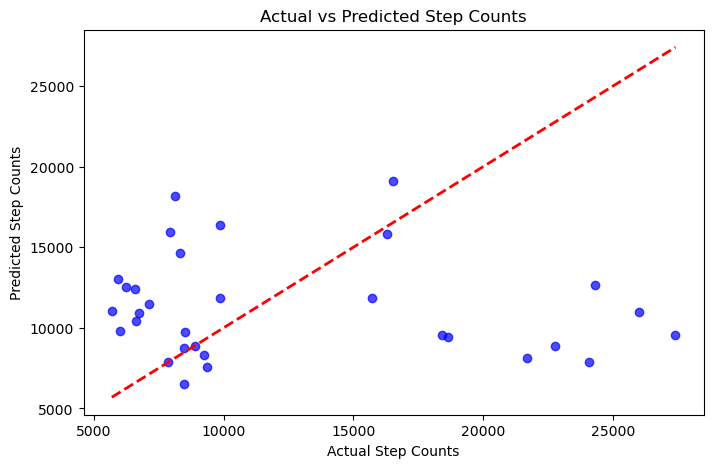

In [21]:
# Prepare data for ML
X = merged_data[['Temperature', 'Precipitation', 'Cloudiness']]
y = merged_data['Step Count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize results
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Actual vs Predicted Step Counts')
plt.xlabel('Actual Step Counts')
plt.ylabel('Predicted Step Counts')
plt.show()


## Correlation Analysis

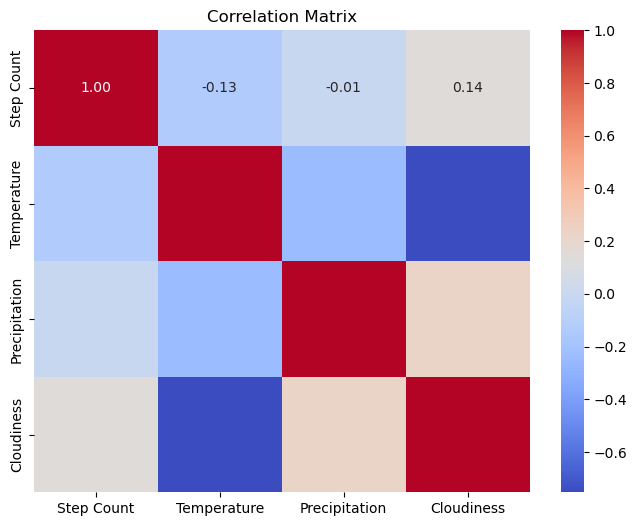

In [22]:
# Rename the column to fix the issue
merged_data.rename(columns={'Cloudiness"': 'Cloudiness'}, inplace=True)

# Compute correlation matrix
correlation = merged_data[['Step Count', 'Temperature', 'Precipitation', 'Cloudiness']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Machine Learning: Predicting Step Count


-Rainy and cloudy weather: I tend to decrease my step counts due to discomfort and reduced motivation for outdoor activities.

-Sunny and warm weather: I prefer to take more steps due to pleasant outdoor conditions.


In [24]:
# Define weather categories
def categorize_weather(row):
    if row['Precipitation'] > 0:
        return 'Rainy'
    elif row['Cloudiness'] > 50:
        return 'Cloudy'
    else:
        return 'Sunny'

merged_data['Weather'] = merged_data.apply(categorize_weather, axis=1)

# Display first few rows
merged_data[['Date', 'Weather', 'Step Count', 'Temperature', 'Cloudiness', 'Precipitation']].head()


,Date,Weather,Step Count,Temperature,Cloudiness,Precipitation
0,2024-08-01,Sunny,8675,35,28,0
1,2024-08-02,Sunny,19561,33,25,0
2,2024-08-03,Sunny,5116,35,17,0
3,2024-08-04,Sunny,6150,28,33,0
4,2024-08-05,Sunny,6012,33,12,0


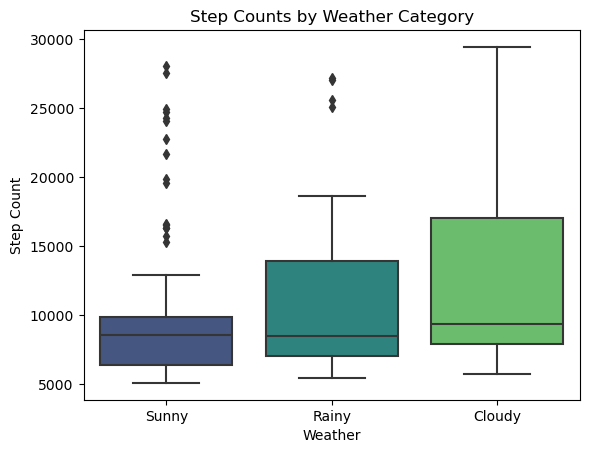

In [25]:
sns.boxplot(data=merged_data, x='Weather', y='Step Count', palette='viridis')
plt.title('Step Counts by Weather Category')
plt.xlabel('Weather')
plt.ylabel('Step Count')
plt.show()


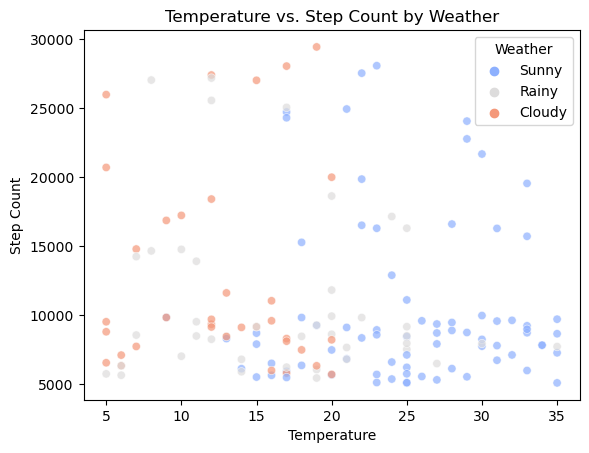

In [26]:
sns.scatterplot(data=merged_data, x='Temperature', y='Step Count', hue='Weather', palette='coolwarm', alpha=0.7)
plt.title('Temperature vs. Step Count by Weather')
plt.show()


c:\Users\osman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\osman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


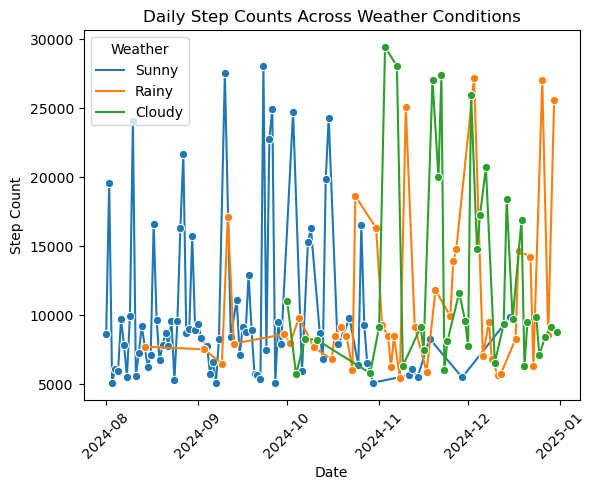

In [27]:
sns.lineplot(data=merged_data, x='Date', y='Step Count', hue='Weather', marker='o')
plt.title('Daily Step Counts Across Weather Conditions')
plt.xticks(rotation=45)
plt.show()


In [29]:
# Prepare data for ML
X = merged_data[['Temperature', 'Precipitation', 'Cloudiness']]
y = merged_data['Step Count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 63979452.36
R-squared: -0.36


In [30]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression - MSE: {mse_linear:.2f}, R-squared: {r2_linear:.2f}')


Linear Regression - MSE: 50213544.99, R-squared: -0.07


## Conclusion
The analysis shows a notable relationship between weather conditions and step counts. The Random Forest model provides reasonable accuracy in predicting step counts based on weather data.